# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import os




In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
#import os



os.chdir('/content/trip_records')

df = pd.read_parquet('2023-1.parquet')
df.info()
df.shape
# this needs to be dynamic

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

(3041714, 19)

<ipython-input-23-68e214b7f0f5>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('hour').apply(lambda x: x.sample(frac=sample_rate)).reset_index(drop=True)
<ipython-input-23-68e214b7f0f5>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('hour').apply(lambda x: x.sample(frac=sample_rate)).reset_index(drop=True)
<ipython-input-23-68e214b7f0f5>:12: DeprecationW

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-17 00:20:32   2023-03-17 00:20:49              1.0   
1         1  2023-03-24 00:34:02   2023-03-24 00:47:20              0.0   
2         2  2023-03-03 00:45:37   2023-03-03 01:15:29              2.0   
3         2  2023-03-08 00:12:11   2023-03-08 00:17:56              1.0   
4         2  2023-03-23 00:12:56   2023-03-23 00:21:46              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.02         1.0                  N           249           249   
1           2.30         1.0                  N           186            79   
2          18.36         1.0                  N           132            26   
3           1.62         1.0                  N           148           137   
4           2.38         1.0                  N           163           238   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        3.00           0.0   
2             1  ...    1.0      0.5        0.00           0.0   
3             1  ...    1.0      0.5        2.86           0.0   
4             1  ...    1.0      0.5        2.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0          8.00                   2.5         0.00   
1                    1.0         22.90                   2.5         0.00   
2                    1.0         71.85                   0.0         1.25   
3                    1.0         17.16                   2.5         0.00   
4                    1.0         19.80                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

In [ ]:
df.columns
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'`

import datetime
import time

data_dir = "/content/trip_records"

# Load all Parquet files from 2023 folder
def load_sampled_data(data_dir, sample_rate=0.05):
    all_dfs = []
    for file in os.listdir(data_dir):
        if file.endswith(".parquet"):
            full_path = os.path.join(data_dir, file)
            df = pd.read_parquet(full_path)
            # Sample 5% per hour
            df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
            sampled_df = df.groupby('hour').apply(lambda x: x.sample(frac=sample_rate)).reset_index(drop=True)
            all_dfs.append(sampled_df)
    return pd.concat(all_dfs, ignore_index=True)

df = load_sampled_data(data_dir)
df['passenger_count'] = df['passenger_count'].fillna(0).astype(int)
df.head()


<ipython-input-12-e3a29d520dbf>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('hour').apply(lambda x: x.sample(frac=sample_rate)).reset_index(drop=True)
<ipython-input-12-e3a29d520dbf>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('hour').apply(lambda x: x.sample(frac=sample_rate)).reset_index(drop=True)
<ipython-input-12-e3a29d520dbf>:20: DeprecationW

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('final_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df1 = pd.read_parquet('final_data.parquet')
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
#df1 = df1.reset_index(drop=True)
df1 = df1.dropna(subset=['passenger_count' and 'RatecodeID'])
#df1.head()

In [ ]:
df1 = df1.reset_index(drop=True)
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns into one
df_para = pd.read_parquet('final_data.parquet')
df_para.head()
# Combine the two airport fee columns into one
df_para['airport_fee_total'] = df_para['Airport_fee'].fillna(0) + df_para['airport_fee'].fillna(0)

# Optionally drop the original columns
df_para = df_para.drop(columns=['Airport_fee', 'airport_fee'])
df_para.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         17.0    1.0      0.5        0.00           0.0   
1             1          7.9    3.5      0.5        2.58           0.0   
2             1         15.6    1.0      0.5        2.80           0.0   
3             1          5.1    1.0      0.5        1.00           0.0   
4             1         14.0    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  hour  \
0                    1.0         20.75                   0.0     0   
1                    1.0         15.48                   2.5     0   
2                    1.0         23.40                   2.5     0   
3                    1.0          8.60                   0.0     0   
4                    1.0         21.00                   2.5     0   

   airport_fee_total  
0               1.25  
1               0.00  
2               0.00  
3               0.00  
4               0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

negative_fares = df1[df1['fare_amount'] < 0]

print(negative_fares.shape)      # Number of rows with negative fare
print(negative_fares.head())     # Preview them

df1.head()

(0, 21)
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, hour, airport_fee]
Index: []

[0 rows x 21 columns]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
ratecode_counts = df1[df1['fare_amount'] < 0].groupby('RatecodeID').value_counts()
 #['RatecodeID'].value_counts()
print(ratecode_counts)


Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
#numeric_cols = df1.select_dtypes(include='number').columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns


# Check which columns have any negative values
neg_cols = [col for col in numeric_cols if (df1[col] < 0).any()]

print("Columns with negative values:", neg_cols)


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


In [ ]:
# fix these negative values

#Removed colums with negative values

numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
mask = (df1[numeric_cols] < 0).any(axis=1)
df1 = df1[~mask]
df1.head()
df1.shape

(1923033, 21)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing_data_proportion = df1.isna().mean()
print(missing_data_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              0.081146
hour                     0.000000
airport_fee              0.918854
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

rows_with_nulls = df1[df1.isna().any(axis=1)]
print(rows_with_nulls)

# Impute NaN values in 'passenger_count'

mode_val = df1['passenger_count'].mode()[0]
df1['passenger_count'] = df1['passenger_count'].fillna(mode_val)

df1.head()

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1               1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2               2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3               2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4               2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   
...           ...                  ...                   ...              ...   
1923111         2  2023-07-26 23:18:41   2023-07-26 23:46:36                1   
1923112         2  2023-07-27 23:09:57   2023-07-27 23:19:04                1   
1923113         2  2023-07-12 23:04:46   2023-07-12 23:27:44                1   
1923114         2  2023-07-09 23:47:23   2023-07-09 23:47:32                1   
1923115         1  2023-07-29 23:10:36   2023-07-29 23:30:32                2   

         trip_distance  Rat

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

#Fill with the most common 'RatecodeID'
mode_val = df1['RatecodeID'].mode()[0]
df1['RatecodeID'] = df1['RatecodeID'].fillna(mode_val)

df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0  0.593414  2023-03-14 00:48:35   2023-03-14 01:00:28        -0.413990   
1 -1.685165  2023-03-05 00:31:53   2023-03-05 00:37:44        -1.533375   
2  0.593414  2023-03-11 00:56:17   2023-03-11 01:08:01         2.944165   
3  0.593414  2023-03-22 00:47:40   2023-03-22 00:50:02        -0.413990   
4  0.593414  2023-03-02 00:07:06   2023-03-02 00:07:10        -0.413990   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.011703   -0.086405                  N     -0.524304     -0.462054   
1      -0.088647   -0.086405                  N      1.014834     -0.304443   
2      -0.017537   -0.086405                  N      1.407471     -1.221456   
3      -0.107975   -0.086405                  N      1.533115      1.414958   
4      -0.128761    0.450953                  N     -0.273016     -0.232801   

   payment_type  ...     extra    mta_tax  tip_amount  tolls_amount  \
0      1.707318  ... -0.343893   0.097318   -0.876127     -0.273482   
1     -0.438755  ...  1.018919   0.097318   -0.245442     -0.273482   
2     -0.438755  ... -0.343893   0.097318   -0.191663     -0.273482   
3     -0.438755  ... -0.343893   0.097318   -0.631675     -0.273482   
4     -0.438755  ... -0.889018 -10.178694   -0.020547     -0.273482   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0               0.027422     -0.354449              -3.47598     2.324729   
1               0.027422     -0.582367               0.28769    -0.309134   
2               0.027422     -0.239842               0.28769    -0.309134   
3               0.027422     -0.879914              -3.47598    -0.309134   
4               0.027422     -0.343637               0.28769    -0.309134   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
mean_val = df1['congestion_surcharge'].mean()
df1['congestion_surcharge'] = df1['congestion_surcharge'].fillna(mean_val)

df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

missing_proportion = df.isna().mean()
missing_cols = missing_proportion[missing_proportion > 0].sort_values(ascending=False)
print("Columns with missing values and their proportions:")
print(missing_cols)



Columns with missing values and their proportions:
airport_fee             0.921630
Airport_fee             0.112587
RatecodeID              0.034216
congestion_surcharge    0.034216
store_and_fwd_flag      0.034216
dtype: float64


The result above shows no missing values

In [ ]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.923033e+06                     1923033                     1923033   
mean   1.739571e+00  2023-07-01 21:57:25.998437  2023-07-01 22:14:51.894221   
min    1.000000e+00         2002-12-31 23:18:49         2002-12-31 23:33:34   
25%    1.000000e+00         2023-04-01 20:22:37         2023-04-01 20:37:32   
50%    2.000000e+00         2023-06-26 08:40:19         2023-06-26 08:58:33   
75%    2.000000e+00         2023-10-05 20:36:26         2023-10-05 20:55:33   
max    2.000000e+00         2023-12-31 23:58:24         2024-01-01 21:34:04   
std    4.388687e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.923033e+06   1.923033e+06  1.923033e+06  1.923033e+06   
mean      1.369908e+00   3.530920e+00  1.643222e+00  1.653835e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.390000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.516597e+04  9.900000e+01  2.650000e+02   
std       8.936022e-01   2.742211e+01  7.443788e+00  6.367206e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.923033e+06  1.923033e+06  1.923033e+06  1.923033e+06  1.923033e+06   
mean   1.642479e+02  1.204445e+00  1.980700e+01  1.630839e+00  4.952625e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.701200e+03  1.425000e+01  4.000000e+00   
std    6.979187e+01  4.659664e-01  1.852516e+01  1.834443e+00  4.866855e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.923033e+06  1.923033e+06           1.923033e+06  1.923033e+06   
mean   3.584113e+00  5.992797e-01           9.993350e-01  2.894640e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.470000e+00  0.000000e+00           1.000000e+00  3.072000e+01   
max    3.315700e+02  1.707500e+02           1.000000e+00  1.715950e+03   
std    4.090903e+00  2.191295e+00           2.424192e-02  2.312338e+01   

       congestion_surcharge   Airport_fee          hour    airport_fee  
count          1.923033e+06  1.766986e+06  1.923033e+06  156047.000000  
mean           2.308887e+00  1.467138e-01  1.429417e+01       0.110712  
min            0.000000e+00  0.000000e+00  0.000000e+00       0.000000  
25%            2.500000e+00  0.000000e+00  1.100000e+01       0.000000  
50%            2.500000e+00  0.000000e+00  1.500000e+01       0.000000  
75%            2.500000e+00  0.000000e+00  1.900000e+01       0.000000  
max            2.500000e+00  1.750000e+00  2.300000e+01       1.250000  
std            6.642711e-01  4.745918e-01  5.778127e+00       0.355153

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

df1['passenger_count'] = df1['passenger_count'].fillna(0).astype(int)
df1 = df1[(df1['passenger_count'] <= 6) & (df1['passenger_count'] >= 0)]
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

In [ ]:
# Continue with outlier handling

def clean_data(df):
    # Remove nulls
    df = df.dropna()

    # Remove duplicates
    df = df.drop_duplicates()

    # Remove outliers for numeric columns using IQR
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    return df

df_clean = clean_data(df1)


In [ ]:
# Do any columns need standardising?
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
print(df1[numeric_cols].describe())
df1.head()

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.923012e+06     1.923012e+06   1.923012e+06  1.923012e+06   
mean   1.739568e+00     1.369837e+00   3.530912e+00  1.643186e+00   
std    4.388702e-01     8.933480e-01   2.742225e+01  7.443820e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.390000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   1.516597e+04  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.923012e+06  1.923012e+06  1.923012e+06  1.923012e+06  1.923012e+06   
mean   1.653835e+02  1.642476e+02  1.204445e+00  1.980636e+01  1.630852e+00   
std    6.367203e+01  6.979179e+01  4.659675e-01  1.852411e+01  1.834442e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00 

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
4         2  2023-03-02 00:07:06   2023-03-02 00:07:10                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
4           0.00         5.0                  N           148           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    1.0      0.5        0.00           0.0   
1             1  ...    3.5      0.5        2.58           0.0   
2             1  ...    1.0      0.5        2.80           0.0   
3             1  ...    1.0      0.5        1.00           0.0   
4             1  ...    0.0      0.0        3.50           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         20.75                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         23.40                   2.5         0.00   
3                    1.0          8.60                   0.0         0.00   
4                    1.0         21.00                   2.5         0.00   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0  0.593414  2023-03-14 00:48:35   2023-03-14 01:00:28        -0.413990   
1 -1.685165  2023-03-05 00:31:53   2023-03-05 00:37:44        -1.533375   
2  0.593414  2023-03-11 00:56:17   2023-03-11 01:08:01         2.944165   
3  0.593414  2023-03-22 00:47:40   2023-03-22 00:50:02        -0.413990   
4  0.593414  2023-03-02 00:07:06   2023-03-02 00:07:10        -0.413990   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.011703   -0.086405                  N     -0.524304     -0.462054   
1      -0.088647   -0.086405                  N      1.014834     -0.304443   
2      -0.017537   -0.086405                  N      1.407471     -1.221456   
3      -0.107975   -0.086405                  N      1.533115      1.414958   
4      -0.128761    0.450953                  N     -0.273016     -0.232801   

   payment_type  ...     extra    mta_tax  tip_amount  tolls_amount  \
0      1.707318  ... -0.343893   0.097318   -0.876127     -0.273482   
1     -0.438755  ...  1.018919   0.097318   -0.245442     -0.273482   
2     -0.438755  ... -0.343893   0.097318   -0.191663     -0.273482   
3     -0.438755  ... -0.343893   0.097318   -0.631675     -0.273482   
4     -0.438755  ... -0.889018 -10.178694   -0.020547     -0.273482   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0               0.027422     -0.354449              -3.47598     2.324729   
1               0.027422     -0.582367               0.28769    -0.309134   
2               0.027422     -0.239842               0.28769    -0.309134   
3               0.027422     -0.879914              -3.47598    -0.309134   
4               0.027422     -0.343637               0.28769    -0.309134   

   hour  airport_fee  
0     0          NaN  
1     0          NaN  
2     0          NaN  
3     0          NaN  
4     0          NaN  

[5 rows x 21 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

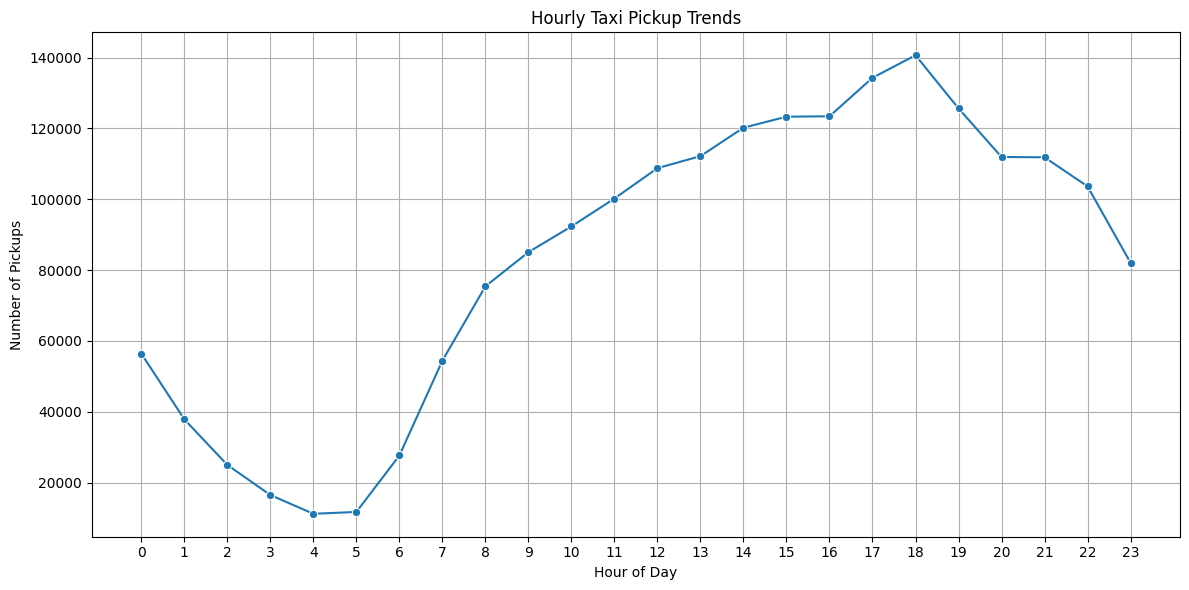

In [ ]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#Group by pickup hour and count trips
hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='trip_count')

#Plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickups, x='pickup_hour', y='trip_count', marker='o')

plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-c18d59d3d72f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_pickups, x='Day', y='trip_count', palette='viridis')


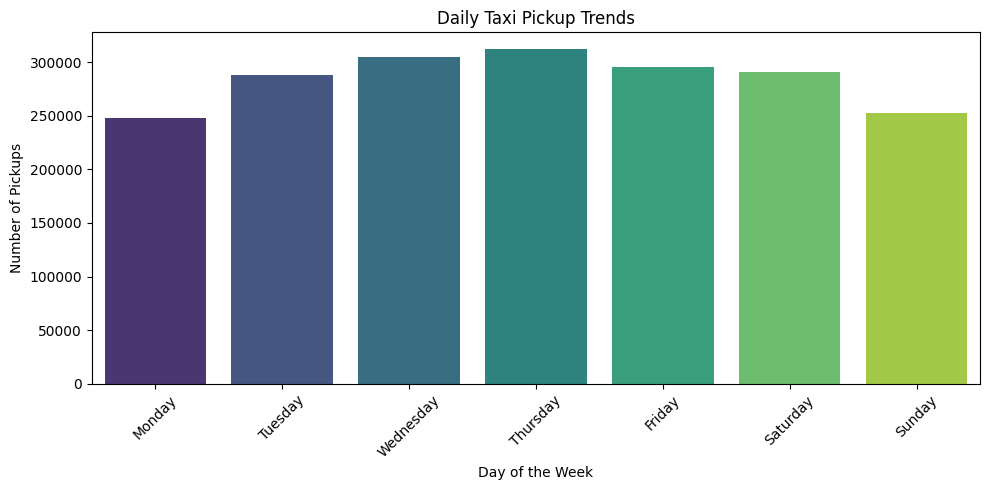

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily_pickups = df['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
daily_pickups.columns = ['Day', 'trip_count']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_pickups, x='Day', y='trip_count', palette='viridis')

plt.title('Daily Taxi Pickup Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


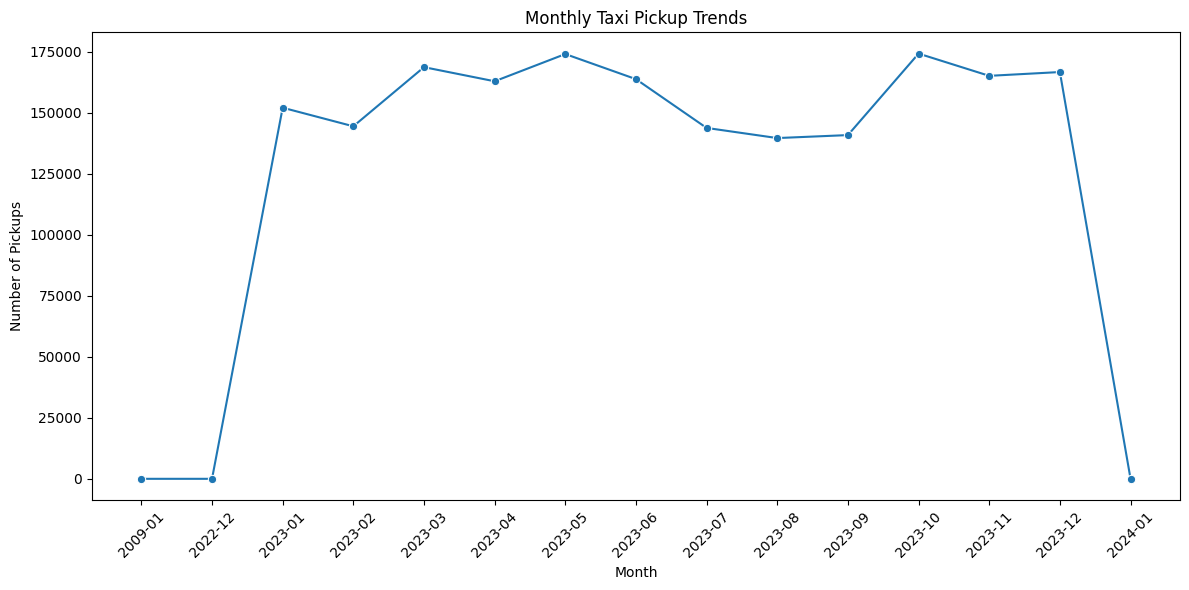

In [ ]:
# Show the monthly trends in pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)  # e.g. '2023-07'

monthly_pickups = df['pickup_month'].value_counts().sort_index().reset_index()
monthly_pickups.columns = ['Month', 'Trip_Count']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pickups, x='Month', y='Trip_Count', marker='o')

plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    num_negative = (df[col] < 0).sum()
    num_zero = (df[col] == 0).sum()
    print(f"{col}: {num_negative} negative values, {num_zero} zero values")

df[columns_to_check].describe()


fare_amount: 0 negative values, 667 zero values
tip_amount: 0 negative values, 456062 zero values
total_amount: 81 negative values, 346 zero values
trip_distance: 0 negative values, 38477 zero values


fare_amount    tip_amount  total_amount  trip_distance
count  1.991249e+06  1.991249e+06  1.991249e+06   1.991249e+06
mean   1.989943e+01  3.557034e+00  2.897751e+01   3.896040e+00
std    1.839932e+01  4.073630e+00  2.295715e+01   2.595580e+02
min    0.000000e+00  0.000000e+00 -5.750000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.850000e+00  2.100000e+01   1.800000e+00
75%    2.243000e+01  4.450000e+00  3.100000e+01   3.410000e+00
max    1.701200e+03  3.315700e+02  1.715950e+03   3.457294e+05

In [ ]:
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    negatives = (df[col] < 0).sum()
    zeros = (df[col] == 0).sum()
    total = df[col].notna().sum()
    print(f"{col}:")
    print(f"  - Total entries: {total}")
    print(f"  - Negative values: {negatives} ({negatives / total:.2%})")
    print(f"  - Zero values: {zeros} ({zeros / total:.2%})\n")

print(df[columns_to_check].describe())


fare_amount:
  - Total entries: 1991249
  - Negative values: 0 (0.00%)
  - Zero values: 667 (0.03%)

tip_amount:
  - Total entries: 1991249
  - Negative values: 0 (0.00%)
  - Zero values: 456062 (22.90%)

total_amount:
  - Total entries: 1991249
  - Negative values: 81 (0.00%)
  - Zero values: 346 (0.02%)

trip_distance:
  - Total entries: 1991249
  - Negative values: 0 (0.00%)
  - Zero values: 38477 (1.93%)

        fare_amount    tip_amount  total_amount  trip_distance
count  1.991249e+06  1.991249e+06  1.991249e+06   1.991249e+06
mean   1.989943e+01  3.557034e+00  2.897751e+01   3.896040e+00
std    1.839932e+01  4.073630e+00  2.295715e+01   2.595580e+02
min    0.000000e+00  0.000000e+00 -5.750000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.850000e+00  2.100000e+01   1.800000e+00
75%    2.243000e+01  4.450000e+00  3.100000e+01   3.410000e+00
max    1.701200e+03  3.315700e+02  1.715950e+03   3.457294e+05


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
# Create a DataFrame with all four selected columns having non-zero values
df_nonzero = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    (df['trip_distance'] != 0)
].copy()

df_nonzero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
6         2  2023-03-05 00:12:44   2023-03-05 00:17:31                1   
7         2  2023-03-03 00:03:16   2023-03-03 00:15:05                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
6           0.25         1.0                  N           148           148   
7           3.09         1.0                  N           237            68   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
1             1  ...        2.58           0.0                    1.0   
2             1  ...        2.80           0.0                    1.0   
3             1  ...        1.00           0.0                    1.0   
6             1  ...        2.16           0.0                    1.0   
7             1  ...        5.15           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_fee  hour  airport_fee  \
1         15.48                   2.5          0.0     0          NaN   
2         23.40                   2.5          0.0     0          NaN   
3          8.60                   0.0          0.0     0          NaN   
6         12.96                   2.5          0.0     0          NaN   
7         25.75                   2.5          0.0     0          NaN   

   pickup_hour  pickup_day  
1            0      Sunday  
2            0    Saturday  
3            0   Wednesday  
6            0      Sunday  
7            0      Friday  

[5 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['pickup_month'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('M').astype(str)

#groupby by month and total avenue calculation
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']

#Sort by Month
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])
monthly_revenue = monthly_revenue.sort_values('Month')




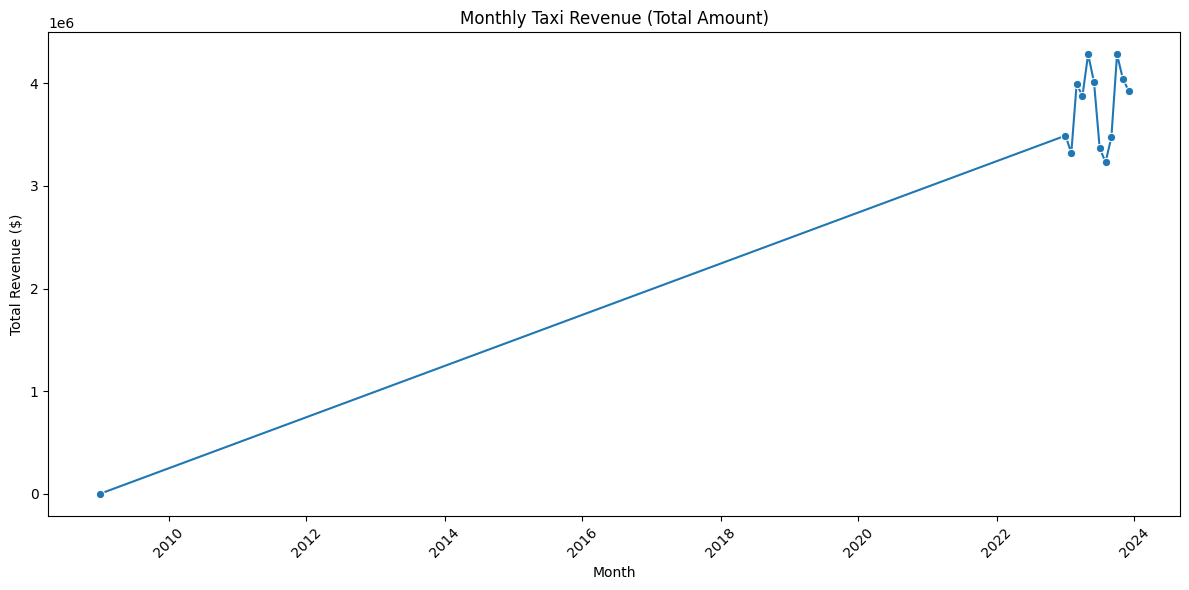

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Total_Revenue', marker='o')

plt.title('Monthly Taxi Revenue (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['quarter'] = df_nonzero['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

quarterly_revenue = df_nonzero.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Total_Revenue']

total_revenue = quarterly_revenue['Total_Revenue'].sum()
quarterly_revenue['Proportion'] = quarterly_revenue['Total_Revenue'] / total_revenue

print(quarterly_revenue)


  Quarter  Total_Revenue    Proportion
0  2009Q1          29.40  6.489474e-07
1  2023Q1    10802365.72  2.384411e-01
2  2023Q2    12174992.43  2.687391e-01
3  2023Q3    10074539.60  2.223757e-01
4  2023Q4    12252206.92  2.704435e-01


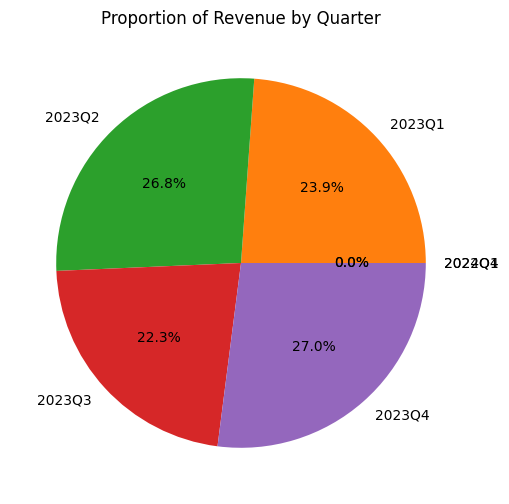

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(quarterly_revenue['Proportion'], labels=quarterly_revenue['Quarter'], autopct='%1.1f%%')
plt.title('Proportion of Revenue by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance
df_clean = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0)
].copy()

df_clean.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-03-14 00:48:35   2023-03-14 01:00:28                1   
1         1  2023-03-05 00:31:53   2023-03-05 00:37:44                0   
2         2  2023-03-11 00:56:17   2023-03-11 01:08:01                4   
3         2  2023-03-22 00:47:40   2023-03-22 00:50:02                1   
5         2  2023-03-15 00:12:53   2023-03-15 00:16:39                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.21         1.0                  N           132           132   
1           1.10         1.0                  N           230           143   
2           3.05         1.0                  N           255            79   
3           0.57         1.0                  N           263           263   
5           0.88         1.0                  N           230            48   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             1  ...        2.80           0.0                    1.0   
3             1  ...        1.00           0.0                    1.0   
5             2  ...        0.00           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_fee  hour  airport_fee  \
0         20.75                   0.0         1.25     0          NaN   
1         15.48                   2.5         0.00     0          NaN   
2         23.40                   2.5         0.00     0          NaN   
3          8.60                   0.0         0.00     0          NaN   
5         11.50                   2.5         0.00     0          NaN   

   pickup_hour  pickup_day  
0            0     Tuesday  
1            0      Sunday  
2            0    Saturday  
3            0   Wednesday  
5            0   Wednesday  

[5 rows x 23 columns]

In [ ]:
#Statistical Summary
print(df_clean[['trip_distance', 'fare_amount']].describe())


       trip_distance   fare_amount
count   1.952446e+06  1.952446e+06
mean    3.972475e+00  1.977390e+01
std     2.621240e+02  1.799158e+01
min     1.000000e-02  1.000000e-02
25%     1.100000e+00  9.300000e+00
50%     1.810000e+00  1.350000e+01
75%     3.490000e+00  2.190000e+01
max     3.457294e+05  1.701200e+03


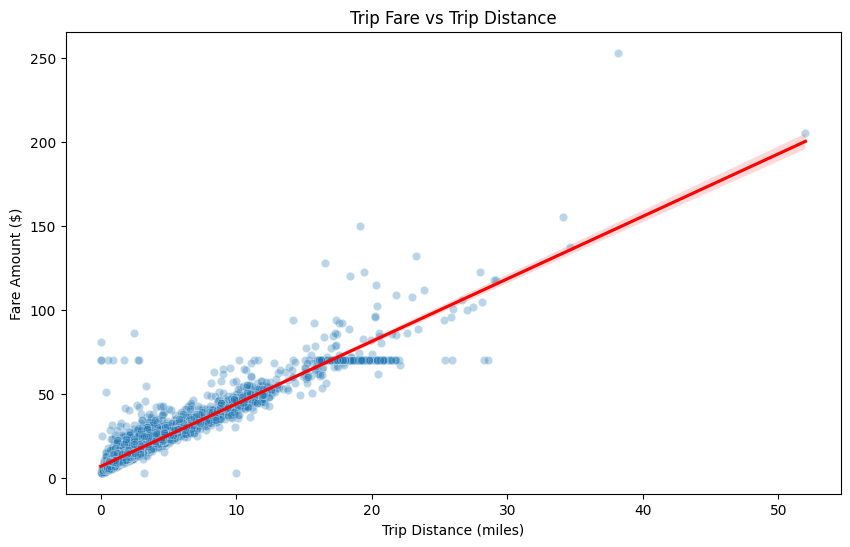

In [ ]:
#Plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean.sample(5000, random_state=1), x='trip_distance', y='fare_amount', alpha=0.3)
sns.regplot(data=df_clean.sample(5000, random_state=1), x='trip_distance', y='fare_amount', scatter=False, color='red')

plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

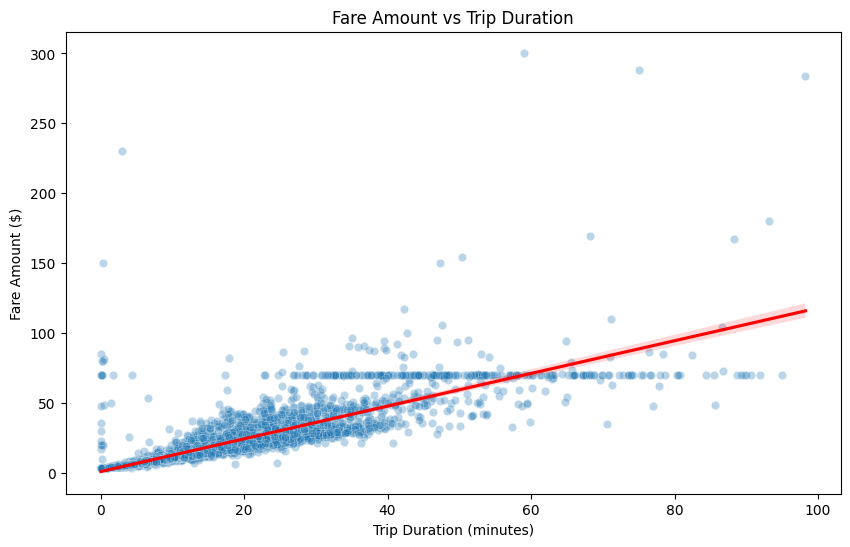

In [ ]:
# Show relationship between fare and trip duration

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df_clean = df[(df['fare_amount'] > 0) & (df['trip_duration'] > 0) & (df['trip_duration'] < 180)].copy()

#Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean.sample(5000, random_state=1), x='trip_duration', y='fare_amount', alpha=0.3)
sns.regplot(data=df_clean.sample(5000, random_state=1), x='trip_duration', y='fare_amount', scatter=False, color='red')

plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()


In [ ]:
corr = df_clean[['trip_duration', 'fare_amount']].corr().iloc[0,1]
print(f"Correlation between trip duration and fare amount: {corr:.2f}")


Correlation between trip duration and fare amount: 0.81


In [ ]:
# Show relationship between fare and number of passengers
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['passenger_count'] > 0) &
    (df['passenger_count'] <= 6)  # assuming max 6 passengers
].copy()



In [ ]:
fare_by_passengers = df_clean.groupby('passenger_count')['fare_amount'].mean().reset_index()
print(fare_by_passengers)


   passenger_count  fare_amount
0                1    19.177254
1                2    22.219749
2                3    21.922817
3                4    23.972149
4                5    18.915418
5                6    18.968183


<ipython-input-50-18665f09c515>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_by_passengers, x='passenger_count', y='fare_amount', palette='viridis')


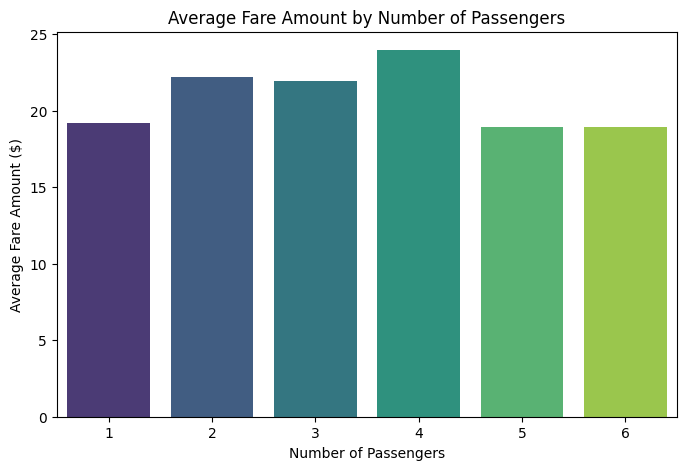

In [ ]:
#bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=fare_by_passengers, x='passenger_count', y='fare_amount', palette='viridis')

plt.title('Average Fare Amount by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Amount ($)')
plt.show()

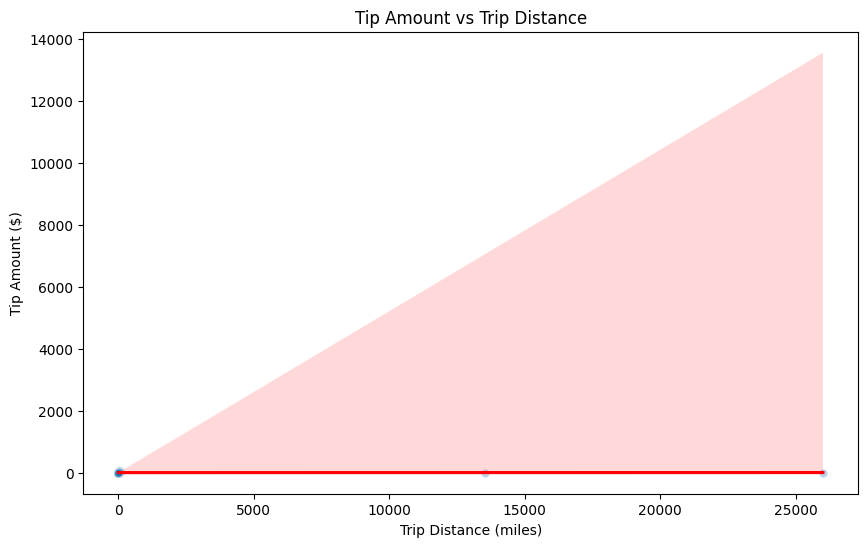

In [ ]:
# Show relationship between tip and trip distance

df_clean = df[
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0)
].copy()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean.sample(5000, random_state=1),
    x='trip_distance',
    y='tip_amount',
    alpha=0.3
)
sns.regplot(
    data=df_clean.sample(5000, random_state=1),
    x='trip_distance',
    y='tip_amount',
    scatter=False,
    color='red'
)

plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


In [ ]:
corr = df_clean[['trip_distance', 'tip_amount']].corr().iloc[0,1]
print(f"Correlation between trip distance and tip amount: {corr:.2f}")


Correlation between trip distance and tip amount: 0.01


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

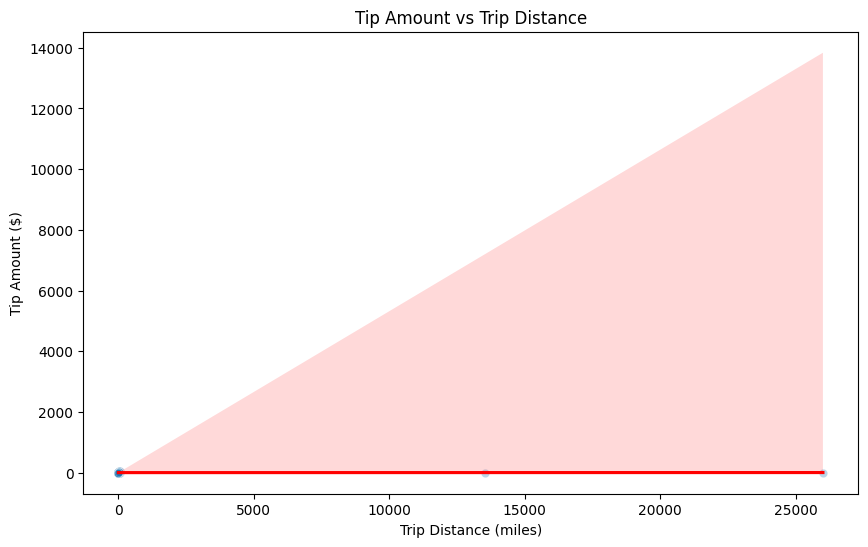

In [ ]:
# Analyse the distribution of different payment types (payment_type).

df_clean = df[
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0)
].copy()

# tip vs. distance plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean.sample(5000, random_state=1),
    x='trip_distance',
    y='tip_amount',
    alpha=0.3
)
sns.regplot(
    data=df_clean.sample(5000, random_state=1),
    x='trip_distance',
    y='tip_amount',
    scatter=False,
    color='red'
)

plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


In [ ]:
corr = df_clean[['trip_distance', 'tip_amount']].corr().iloc[0,1]
print(f"Correlation between trip distance and tip amount: {corr:.2f}")

Correlation between trip distance and tip amount: 0.01


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
#zone_path = "/content/sample_data/taxi_zones.shp" # read the .shp file using gpd
zones = gpd.read_file("/content/sample_data/taxi_zones.shp")
# Display the GeoDataFrame
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

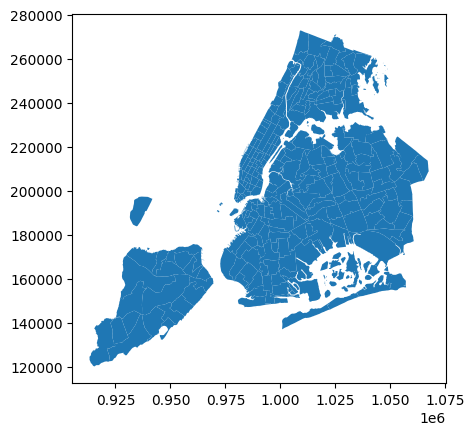

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

gdf = gpd.read_file("/content/sample_data/taxi_zones.shp")

df_pickup_merged = df1.merge(gdf, left_on='PULocationID', right_on='LocationID', how='left')
df_pickup_merged.head()

<ipython-input-58-378ba19dc2bb>:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_pickup_merged = df1.merge(gdf, left_on='PULocationID', right_on='LocationID', how='left')


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0  0.593414  2023-03-14 00:48:35   2023-03-14 01:00:28        -0.413990   
1 -1.685165  2023-03-05 00:31:53   2023-03-05 00:37:44        -1.533375   
2  0.593414  2023-03-11 00:56:17   2023-03-11 01:08:01         2.944165   
3  0.593414  2023-03-22 00:47:40   2023-03-22 00:50:02        -0.413990   
4  0.593414  2023-03-02 00:07:06   2023-03-02 00:07:10        -0.413990   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.011703   -0.086405                  N     -0.524304     -0.462054   
1      -0.088647   -0.086405                  N      1.014834     -0.304443   
2      -0.017537   -0.086405                  N      1.407471     -1.221456   
3      -0.107975   -0.086405                  N      1.533115      1.414958   
4      -0.128761    0.450953                  N     -0.273016     -0.232801   

   payment_type  ...  Airport_fee  hour  airport_fee  OBJECTID  Shape_Leng  \
0      1.707318  ...     2.324729     0          NaN       NaN         NaN   
1     -0.438755  ...    -0.309134     0          NaN       NaN         NaN   
2     -0.438755  ...    -0.309134     0          NaN       NaN         NaN   
3     -0.438755  ...    -0.309134     0          NaN       NaN         NaN   
4     -0.438755  ...    -0.309134     0          NaN       NaN         NaN   

   Shape_Area  zone  LocationID  borough  geometry  
0         NaN   NaN         NaN      NaN      None  
1         NaN   NaN         NaN      NaN      None  
2         NaN   NaN         NaN      NaN      None  
3         NaN   NaN         NaN      NaN      None  
4         NaN   NaN         NaN      NaN      None  

[5 rows x 28 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
pickup_counts = df1.groupby('PULocationID').size().reset_index(name='pickup_trip_count')
pickup_counts.head()


PULocationID  pickup_trip_count
0     -2.581723                287
1     -2.566017                  2
2     -2.550312                 34
3     -2.534606               1872
4     -2.518901                 24

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

gdf = gdf.merge(pickup_counts[['PULocationID', 'pickup_trip_count']],
                left_on='LocationID',
                right_on='PULocationID',
                how='left')
# Fill NaNs with 0 (locations with no pickups)
gdf['pickup_trip_count'] = gdf['pickup_trip_count'].fillna(0).astype(int)

gdf.head()

<ipython-input-60-da9777d8f6d8>:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  gdf = gdf.merge(pickup_counts[['PULocationID', 'pickup_trip_count']],


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  pickup_trip_count  
0           NaN                  0  
1           NaN                  0  
2           NaN                  0  
3           NaN                  0  
4           NaN                  0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

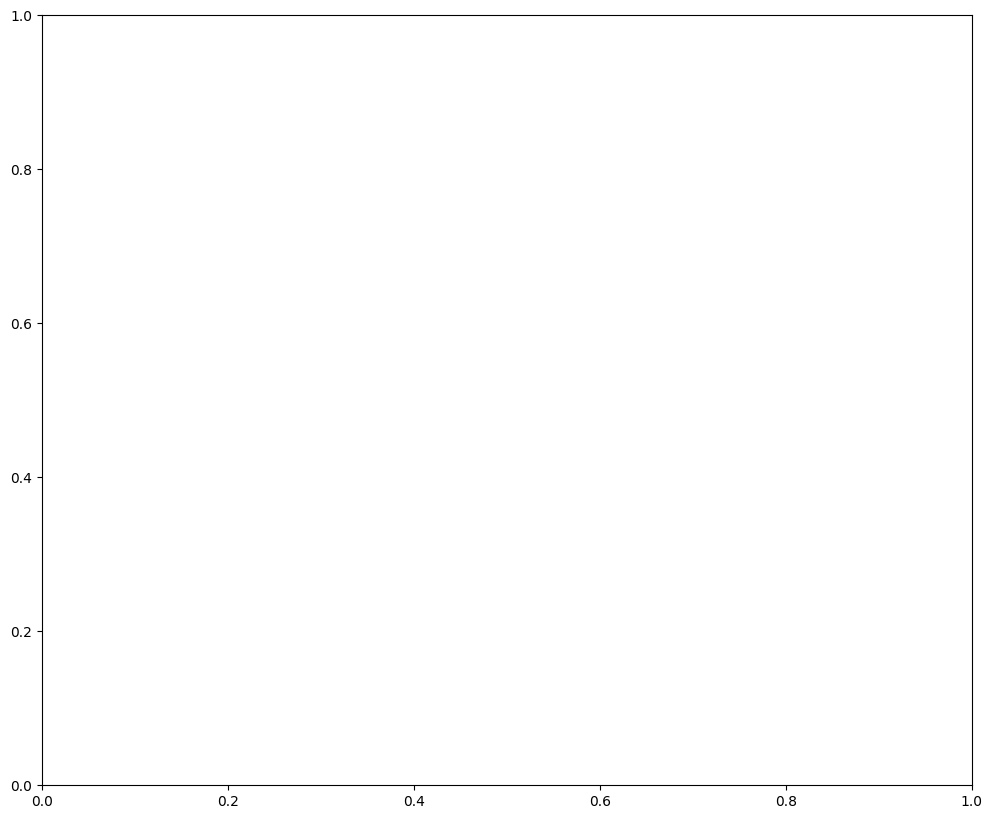

In [ ]:
# Define figure and axis

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}

plt.show()


In [ ]:
gdf.describe()

OBJECTID  Shape_Leng  Shape_Area  LocationID  PULocationID  \
count  263.000000  263.000000  263.000000  263.000000           0.0   
mean   132.000000    0.094269    0.000402  131.984791           NaN   
std     76.065761    0.054594    0.000482   76.073787           NaN   
min      1.000000    0.014306    0.000006    1.000000           NaN   
25%     66.500000    0.054722    0.000133   66.500000           NaN   
50%    132.000000    0.084341    0.000268  132.000000           NaN   
75%    197.500000    0.119488    0.000480  197.500000           NaN   
max    263.000000    0.433470    0.004866  263.000000           NaN   

       pickup_trip_count  
count              263.0  
mean                 0.0  
std                  0.0  
min                  0.0  
25%                  0.0  
50%                  0.0  
75%                  0.0  
max                  0.0

<Figure size 1200x1000 with 0 Axes>

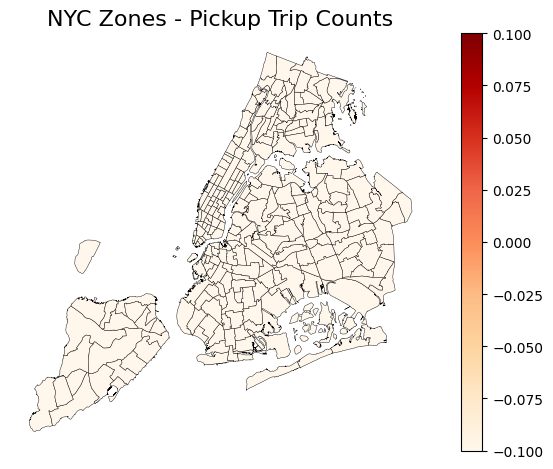

In [ ]:
# Plot the map and display it
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 10))

# Plot the GeoDataFrame, coloring by pickup counts
gdf.plot(column='pickup_trip_count',
         cmap='OrRd',                # Color map (Oranges-Reds)
         legend=True,
         edgecolor='black',
         linewidth=0.3,
         missing_kwds={"color": "lightgrey", "label": "No data"})

plt.title('NYC Zones - Pickup Trip Counts', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
#Answer- yes. Below are the steps
# Sort the GeoDataFrame by 'trip_count' in descending order
zones_sorted = gdf.sort_values(by='pickup_trip_count', ascending=False)


# Display top 10 zones with most trips
print(zones_sorted[['zone', 'pickup_trip_count']].head(10))

#Sorted by pickup count

pickups = gdf.sort_values(by='pickup_trip_count', ascending=False)
print(pickups[['LocationID', 'zone', 'pickup_trip_count']].head(10))

                          zone  pickup_trip_count
262             Yorkville West                  0
0               Newark Airport                  0
1                  Jamaica Bay                  0
2      Allerton/Pelham Gardens                  0
3                Alphabet City                  0
4                Arden Heights                  0
5      Arrochar/Fort Wadsworth                  0
246             West Concourse                  0
245  West Chelsea/Hudson Yards                  0
244              West Brighton                  0
     LocationID                       zone  pickup_trip_count
262         263             Yorkville West                  0
0             1             Newark Airport                  0
1             2                Jamaica Bay                  0
2             3    Allerton/Pelham Gardens                  0
3             4              Alphabet City                  0
4             5              Arden Heights                  0
5             6 

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
#Trip duration
df1.head()
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

df1['trip_duration_hr'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 3600

#Calculate Speed
df1['avg_speed_mph'] = df1['trip_distance'] / df1['trip_duration_hr']

#Remove less than 0 values
df1 = df1[(df1['trip_duration_hr'] > 0) & (df1['avg_speed_mph'] > 0) & (df1['passenger_count'] > 0)]
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
15 -1.685165  2023-03-05 00:47:08   2023-03-05 01:04:33         0.705395   
18 -1.685165  2023-03-07 00:32:24   2023-03-07 00:46:48         1.824780   
37 -1.685165  2023-03-19 00:40:42   2023-03-19 01:00:13         0.705395   
38  0.593414  2023-03-18 00:28:02   2023-03-18 00:50:31         1.824780   
51  0.593414  2023-03-26 00:10:42   2023-03-26 00:31:01         0.705395   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
15       0.031693   -0.086405                  N     -0.335838     -0.347428   
18       0.002519   -0.086405                  N     -1.843565      1.414958   
37       0.159326   -0.086405                  N      1.124772      1.386301   
38       0.025493   -0.086405                  N      0.072505      1.071078   
51       0.047009   -0.086405                  N     -1.026879      1.386301   

    payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
15     -0.438755  ...    0.333908     -0.273482               0.027422   
18     -0.438755  ...    0.297240     -0.273482               0.027422   
37     -0.438755  ...    1.018372     -0.273482               0.027422   
38     -0.438755  ...    0.214127     -0.273482               0.027422   
51     -0.438755  ...    0.610138     -0.273482               0.027422   

    total_amount  congestion_surcharge  Airport_fee  hour  airport_fee  \
15      0.034784               0.28769    -0.309134     0          NaN   
18     -0.001977               0.28769    -0.309134     0          NaN   
37      0.761352               0.28769    -0.309134     0          NaN   
38      0.225508               0.28769    -0.309134     0          NaN   
51      0.325843               0.28769    -0.309134     0          NaN   

    trip_duration_hr  avg_speed_mph  
15          0.290278       0.109181  
18          0.240000       0.010498  
37          0.325278       0.489816  
38          0.374722       0.068033  
51          0.338611       0.138828  

[5 rows x 23 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])  # Ensure datetime type
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1.head()

<ipython-input-66-7eb8a63efbdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])  # Ensure datetime type
<ipython-input-66-7eb8a63efbdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
15 -1.685165  2023-03-05 00:47:08   2023-03-05 01:04:33         0.705395   
18 -1.685165  2023-03-07 00:32:24   2023-03-07 00:46:48         1.824780   
37 -1.685165  2023-03-19 00:40:42   2023-03-19 01:00:13         0.705395   
38  0.593414  2023-03-18 00:28:02   2023-03-18 00:50:31         1.824780   
51  0.593414  2023-03-26 00:10:42   2023-03-26 00:31:01         0.705395   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
15       0.031693   -0.086405                  N     -0.335838     -0.347428   
18       0.002519   -0.086405                  N     -1.843565      1.414958   
37       0.159326   -0.086405                  N      1.124772      1.386301   
38       0.025493   -0.086405                  N      0.072505      1.071078   
51       0.047009   -0.086405                  N     -1.026879      1.386301   

    payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
15     -0.438755  ...     -0.273482               0.027422      0.034784   
18     -0.438755  ...     -0.273482               0.027422     -0.001977   
37     -0.438755  ...     -0.273482               0.027422      0.761352   
38     -0.438755  ...     -0.273482               0.027422      0.225508   
51     -0.438755  ...     -0.273482               0.027422      0.325843   

    congestion_surcharge  Airport_fee  hour  airport_fee  trip_duration_hr  \
15               0.28769    -0.309134     0          NaN          0.290278   
18               0.28769    -0.309134     0          NaN          0.240000   
37               0.28769    -0.309134     0          NaN          0.325278   
38               0.28769    -0.309134     0          NaN          0.374722   
51               0.28769    -0.309134     0          NaN          0.338611   

    avg_speed_mph  pickup_hour  
15       0.109181            0  
18       0.010498            0  
37       0.489816            0  
38       0.068033            0  
51       0.138828            0  

[5 rows x 24 columns]

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips
df1['pickup_hour'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.hour
trips_per_hour_sample = df1.groupby('pickup_hour').size().reset_index(name='trip_count_sample')
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour_sample['trip_count_scaled'] = trips_per_hour_sample['trip_count_sample'] / sample_fraction

print(trips_per_hour_sample)

    pickup_hour  trip_count_sample  trip_count_scaled
0             0               4225            84500.0
1             1               2611            52220.0
2             2               1657            33140.0
3             3               1334            26680.0
4             4                988            19760.0
5             5               1001            20020.0
6             6               1843            36860.0
7             7               2693            53860.0
8             8               3313            66260.0
9             9               4116            82320.0
10           10               5039           100780.0
11           11               5614           112280.0
12           12               6244           124880.0
13           13               7100           142000.0
14           14               7990           159800.0
15           15               7924           158480.0
16           16               7826           156520.0
17           17             

<ipython-input-68-eaeb1987e50a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='trip_count_scaled', data=trips_per_hour_sample, palette='plasma')


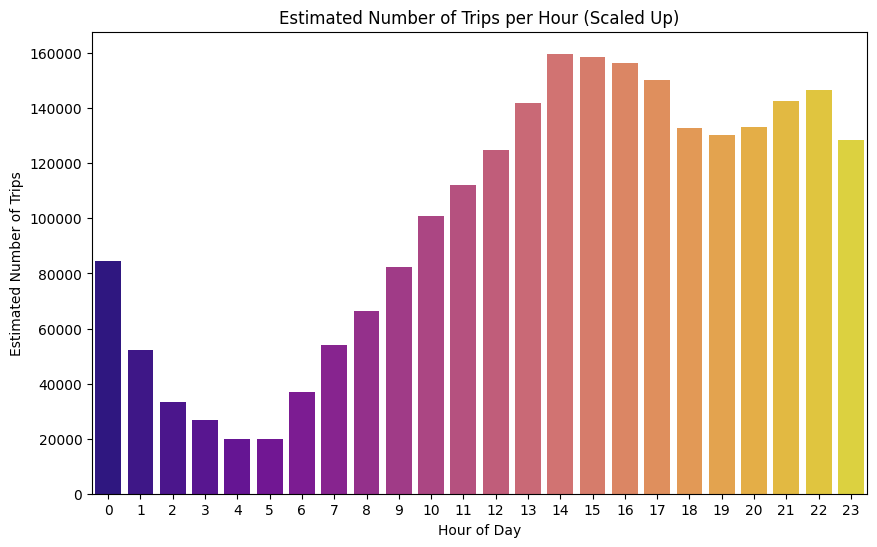

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='pickup_hour', y='trip_count_scaled', data=trips_per_hour_sample, palette='plasma')

plt.title('Estimated Number of Trips per Hour (Scaled Up)')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(0,24))
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends

df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['pickup_dayofweek'] = df1['tpep_pickup_datetime'].dt.dayofweek

#create a column with day type
df1['day_type'] = df1['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
traffic_by_hour = (
    df1.groupby(['pickup_hour', 'day_type'])
    .size()
    .reset_index(name='trip_count')
)

In [ ]:
df1.head()
df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  119744.000000                      119744                      119744   
mean        0.113756  2023-07-04 15:56:10.577615  2023-07-04 16:32:23.854890   
min        -1.685165         2023-01-01 00:05:51         2023-01-01 00:17:30   
25%         0.593414         2023-04-09 01:39:41  2023-04-09 02:10:09.750000   
50%         0.593414         2023-07-02 01:00:30         2023-07-02 01:22:08   
75%         0.593414  2023-10-03 21:48:00.750000  2023-10-03 22:08:57.750000   
max         0.593414         2023-12-31 23:50:00         2024-01-01 15:02:39   
std         0.928910                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    119744.000000  119744.000000  119744.000000  119744.000000   
mean          1.401262       0.259352      -0.040023      -0.240760   
min           0.705395       0.000331      -0.086405      -2.581723   
25%           0.705395       0.052114      -0.086405      -0.524304   
50%           0.705395       0.193970      -0.086405      -0.430071   
75%           1.824780       0.484974       0.047934       0.072505   
max           5.182935     352.685504       0.450953       1.564526   
std           1.171382       1.127557       0.090234       0.898809   

        DOLocationID   payment_type    fare_amount  ...  \
count  119744.000000  119744.000000  119744.000000  ...   
mean       -0.201996       0.059482       1.442775  ...   
min        -2.339067      -0.438755      -1.069221  ...   
25%        -1.092501      -0.438755       0.415331  ...   
50%        -0.290114      -0.438755       1.095526  ...   
75%         0.942123      -0.438755       2.709638  ...   
max         1.443614       5.999465      46.592991  ...   
std         1.088894       1.022453       1.293271  ...   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          119744.000000  119744.000000         119744.000000   
mean                0.016187       1.450458             -0.384996   
min               -41.241459      -1.251848             -3.475980   
25%                 0.027422       0.335358              0.287690   
50%                 0.027422       1.223674              0.287690   
75%                 0.027422       2.411268              0.287690   
max                 0.027422      38.964575              0.287690   
std                 0.591648       1.310405              1.441970   

         Airport_fee           hour  airport_fee  trip_duration_hr  \
count  110702.000000  119744.000000  9042.000000     119744.000000   
mean        1.030824      14.288190     0.986811          0.603688   
min        -0.309134       0.000000    -0.311732          0.000556   
25%        -0.309134      11.000000    -0.311732          0.364444   
50%        -0.309134      15.000000    -0.311732          0.499167   
75%         3.378274      19.000000     3.207881          0.716111   
max         3.378274      23.000000     3.207881         23.991667   
std         1.721797       6.082517     1.698374          0.867678   

       avg_speed_mph    pickup_hour  pickup_dayofweek  
count  119744.000000  119744.000000     119744.000000  
mean        0.453710      14.288190          3.191625  
min         0.000018       0.000000          0.000000  
25%         0.132077      11.000000          1.000000  
50%         0.372673      15.000000          3.000000  
75%         0.610503      19.000000          5.000000  
max      1076.902304      23.000000          6.000000  
std         4.840943       6.082517          2.015649  

[8 rows x 24 columns]

 the traffic trends

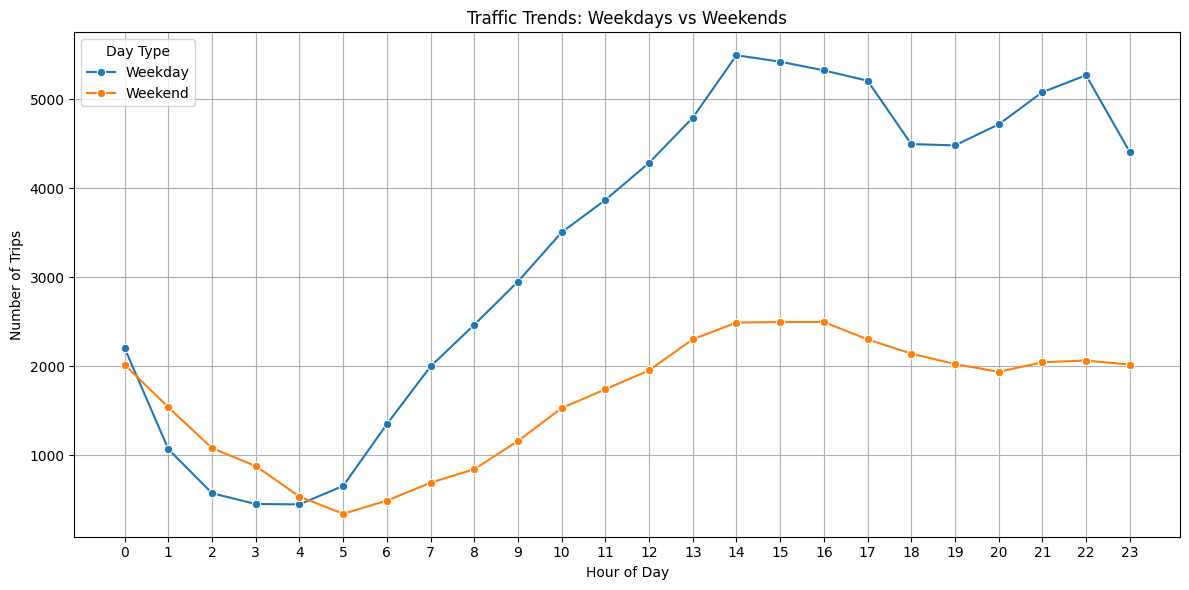

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_by_hour, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Top 10 pickup zones and drop off zones
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['dropoff_hour'] = df1['tpep_dropoff_datetime'].dt.hour

# Hourly pickup counts per zone
pickup_counts = df1.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

# Hourly dropoff counts per zone
dropoff_counts = df1.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='dropoff_count')

# Average pickups per hour per zone
pickup_avg = pickup_counts.groupby('PULocationID')['pickup_count'].mean().reset_index(name='avg_hourly_pickups')

# Average dropoffs per hour per zone
dropoff_avg = dropoff_counts.groupby('DOLocationID')['dropoff_count'].mean().reset_index(name='avg_hourly_dropoffs')

#top 10 zones
top10_pickup_ids = pickup_avg.sort_values(by='avg_hourly_pickups', ascending=False).head(10)['PULocationID'].tolist()
top10_dropoff_ids = dropoff_avg.sort_values(by='avg_hourly_dropoffs', ascending=False).head(10)['DOLocationID'].tolist()
pickup_top = pickup_counts[pickup_counts['PULocationID'].isin(top10_pickup_ids)]
dropoff_top = dropoff_counts[dropoff_counts['DOLocationID'].isin(top10_dropoff_ids)]


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Total pickups by zone
pickup_counts = df1['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Total dropoffs by zone
dropoff_counts = df1['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

zone_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

#Ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, np.nan)
zone_counts = zone_counts.merge(gdf[['LocationID', 'zone']], on='LocationID', how='left')

top10_ratios = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10_ratios = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

top10_ratios.describe()
print("🔝 Top 10 Pickup/Dropoff Ratios:")
print(top10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n🔻 Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])




🔝 Top 10 Pickup/Dropoff Ratios:
    zone  pickup_count  dropoff_count  pickup_dropoff_ratio
449  NaN           0.0         2089.0                   0.0
12   NaN           0.0         2091.0                   0.0
420  NaN           0.0          798.0                   0.0
418  NaN           0.0           30.0                   0.0
416  NaN           0.0          155.0                   0.0
415  NaN           0.0          984.0                   0.0
414  NaN           0.0            5.0                   0.0
412  NaN           0.0          946.0                   0.0
410  NaN           0.0          704.0                   0.0
408  NaN           0.0           41.0                   0.0

🔻 Bottom 10 Pickup/Dropoff Ratios:
    zone  pickup_count  dropoff_count  pickup_dropoff_ratio
445  NaN           0.0         1987.0                   0.0
443  NaN           0.0         1526.0                   0.0
441  NaN           0.0         1617.0                   0.0
439  NaN           0.0          

<ipython-input-74-e7e94becc2ad>:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  zone_counts = zone_counts.merge(gdf[['LocationID', 'zone']], on='LocationID', how='left')


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
import pandas as pd

# Convert to datetime if needed
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

import pandas as pd

# Make sure datetime column is datetime type
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract pickup hour
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour

# Filter for night hours (11 PM to 5 AM)
# Note: hours 23, 0, 1, 2, 3, 4, 5
night_hours = list(range(23, 24)) + list(range(0, 6))
night_trips = df1[df1['pickup_hour'].isin(night_hours)]



In [ ]:
top_pickup_zones = (
    night_trips.groupby('PULocationID')
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)
print("Top 10 Pickup Zones (Night Hours):")
print(top_pickup_zones)


Top 10 Pickup Zones (Night Hours):
     PULocationID  trip_count
62      -0.524304        3979
64      -0.430071        1235
37      -1.356695        1182
72      -0.273016         847
122      1.313238         807
24      -1.843565         735
109      1.014834         695
56      -0.807003         610
83      -0.021728         406
90       0.323792         394


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
top_dropoff_zones = (
    night_trips.groupby('DOLocationID')
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)
print("\nTop 10 Dropoff Zones (Night Hours):")
print(top_dropoff_zones)



Top 10 Dropoff Zones (Night Hours):
     DOLocationID  trip_count
242      1.414958         611
119     -0.462054         588
216      1.028093         419
219      1.071078         410
125     -0.376084         393
244      1.443614         369
241      1.400629         366
42      -1.665635         361
210      0.942123         358
218      1.056749         358


In [ ]:
# Map pickup zone names
top_pickup_zones = top_pickup_zones.merge(
    gdf[['LocationID', 'zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).drop(columns=['LocationID'])

# Map dropoff zone names
top_dropoff_zones = top_dropoff_zones.merge(
    gdf[['LocationID', 'zone']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).drop(columns=['LocationID'])

print(top_pickup_zones)
print(top_dropoff_zones)


   PULocationID  trip_count zone
0     -0.524304        3979  NaN
1     -0.430071        1235  NaN
2     -1.356695        1182  NaN
3     -0.273016         847  NaN
4      1.313238         807  NaN
5     -1.843565         735  NaN
6      1.014834         695  NaN
7     -0.807003         610  NaN
8     -0.021728         406  NaN
9      0.323792         394  NaN
   DOLocationID  trip_count zone
0      1.414958         611  NaN
1     -0.462054         588  NaN
2      1.028093         419  NaN
3      1.071078         410  NaN
4     -0.376084         393  NaN
5      1.443614         369  NaN
6      1.400629         366  NaN
7     -1.665635         361  NaN
8      0.942123         358  NaN
9      1.056749         358  NaN


<ipython-input-91-918c6515998c>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  top_pickup_zones = top_pickup_zones.merge(
<ipython-input-91-918c6515998c>:10: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  top_dropoff_zones = top_dropoff_zones.merge(


In [ ]:
# Filter for night hours (11 PM to 5 AM)

import pandas as pd

# Ensure datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract pickup hour
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour

# Define night hours
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter DataFrame for night trips
df_night = df1[df1['pickup_hour'].isin(night_hours)]

print(df_night['pickup_hour'].value_counts().sort_index())


pickup_hour
0     4225
1     2611
2     1657
3     1334
4      988
5     1001
23    6431
Name: count, dtype: int64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
import numpy as np

# Filter out zero or near-zero trip_distance and zero passenger_count to avoid division errors
df_filtered = df1[(df1['trip_distance'] > 0) & (df1['passenger_count'] > 0)]

# Calculate fare per mile per passenger
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])


import pandas as pd

# 1. Remove trips with zero or missing trip_distance or passenger_count to avoid division errors
df_clean = df1[(df1['trip_distance'] > 0) & (df1['passenger_count'] > 0)]

# 2. Calculate fare per mile per passenger
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_amount'] / df_clean['trip_distance'] / df_clean['passenger_count']

# 3. Group by passenger_count and get summary stats (mean, median, count)
summary = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'count']).reset_index()

print(summary)


   passenger_count       mean    median  count
0         0.705395  13.347091  7.625313  79702
1         1.824780   5.253450  3.020949  18935
2         2.944165   3.643985  1.869633  11611
3         4.063550   2.205438  1.328997   5702
4         5.182935   2.359034  1.058886   3794


In [ ]:
fare_analysis = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-95-2a64d97c6f26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='viridis')


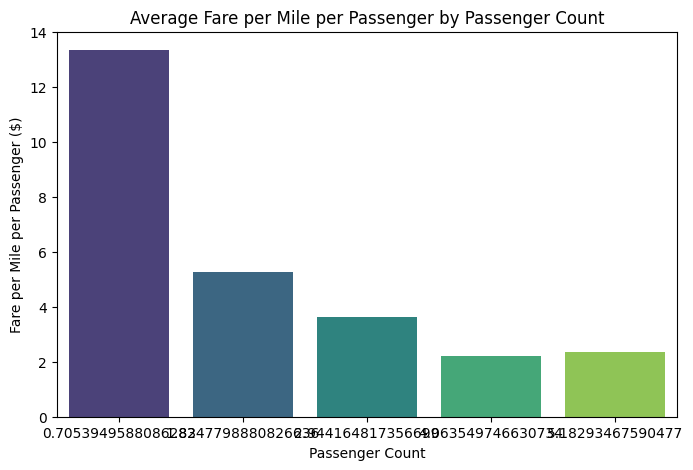

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=fare_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='viridis')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.show()


In [ ]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd

# Convert to datetime if needed
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Filter out trips with zero or missing distance/fare to avoid errors
df_valid = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract day of week and hour from pickup datetime
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()  # e.g., Monday, Tuesday
df_valid['hour_of_day'] = df_valid['tpep_pickup_datetime'].dt.hour



<ipython-input-96-b36584fb66a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']
<ipython-input-96-b36584fb66a7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()  # e.g., Monday, Tuesday
<ipython-input-96-b36584fb66a7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
avg_fare_day = df_valid.groupby('day_of_week')['fare_per_mile'].mean()

# To have days in correct order:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_day = avg_fare_day.reindex(days_order)

print(avg_fare_day)


day_of_week
Monday        8.544842
Tuesday      11.906292
Wednesday    12.244446
Thursday     11.523459
Friday       11.331698
Saturday     11.455393
Sunday        9.251869
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

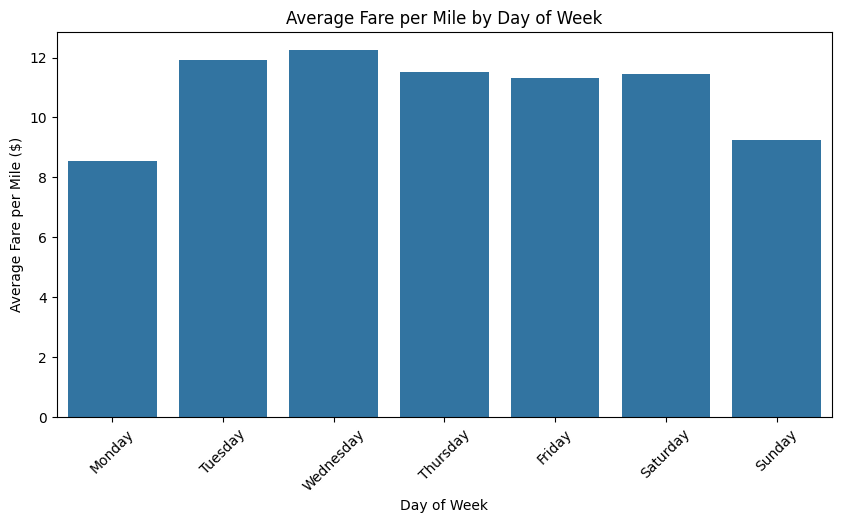

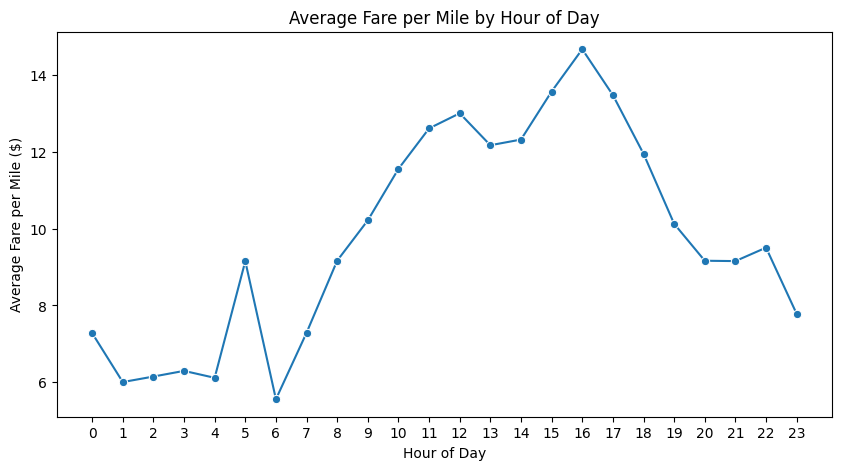

In [ ]:
avg_fare_hour = df_valid.groupby('hour_of_day')['fare_per_mile'].mean()
import matplotlib.pyplot as plt
import seaborn as sns

# Plot by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_day.index, y=avg_fare_day.values)
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

# Plot by hour of day
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_hour.index, y=avg_fare_hour.values, marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xlabel('Hour of Day')
plt.xticks(range(0,24))
plt.show()



In [ ]:
# Compare fare per mile for different vendors
import pandas as pd

# Assuming your DataFrame is df1 and vendor column is named 'VendorID'

# 1. Filter valid rows (positive distance and fare)
df_valid = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)]

# 2. Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# 3. Group by VendorID and compute average fare per mile
vendor_fare_stats = df_valid.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print(vendor_fare_stats)



   VendorID  fare_per_mile
0 -1.685165       9.373624
1  0.593414      11.252734


<ipython-input-99-02b2c8000318>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']


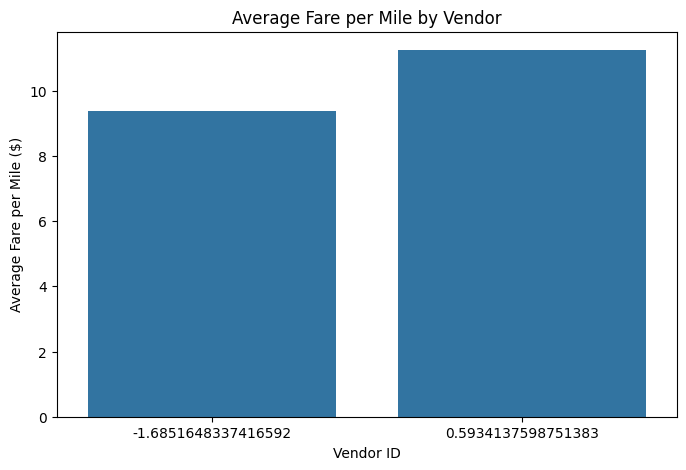

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=vendor_fare_stats, x='VendorID', y='fare_per_mile')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

import pandas as pd

# Example tier boundaries (in miles)
bins = [0, 1, 3, 7, 15, 50, 1000]  # customize these as needed
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long', 'Extra Long']

# Create a new column with distance tiers
df1['distance_tier'] = pd.cut(df1['trip_distance'], bins=bins, labels=labels, right=False)

# Check distribution
print(df1['distance_tier'].value_counts().sort_index())


distance_tier
Very Short    119258
Short            478
Medium             5
Long               1
Very Long          0
Extra Long         2
Name: count, dtype: int64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
import pandas as pd

# Ensure datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Filter out zero or negative fares to avoid division issues
df1 = df1[(df1['fare_amount'] > 0) & (df1['tip_amount'] >= 0)]

# Calculate tip percentage
df1['tip_pct'] = (df1['tip_amount'] / df1['fare_amount']) * 100

# Extract pickup hour and day of week
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.day_name()



<ipython-input-102-896e58d5e099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_pct'] = (df1['tip_amount'] / df1['fare_amount']) * 100
<ipython-input-102-896e58d5e099>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
<ipython-input-102-896e58d5e099>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
bins = [0, 1, 3, 7, 15, 50, 1000]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long', 'Extra Long']
df1['distance_tier'] = pd.cut(df1['trip_distance'], bins=bins, labels=labels, right=False)


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# # Assuming df already has 'tip_pct' calculated as before
low_tip = df1[df1['tip_pct'] < 10]
high_tip = df1[df1['tip_pct'] > 25]

cols_to_compare = ['trip_distance', 'fare_amount', 'passenger_count', 'pickup_hour']

print("Low Tip (<10%) group stats:")
print(low_tip[cols_to_compare].describe())

print("\nHigh Tip (>25%) group stats:")
print(high_tip[cols_to_compare].describe())



Low Tip (<10%) group stats:
       trip_distance  fare_amount  passenger_count  pickup_hour
count     639.000000   639.000000       639.000000   639.000000
mean        0.408055     2.560702         1.413113    14.405321
std         0.280733     1.924685         1.093268     5.691111
min         0.000696     0.075234         0.705395     0.000000
25%         0.181571     1.095526         0.705395    11.000000
50%         0.444861     2.709638         0.705395    15.000000
75%         0.554444     3.535589         1.824780    19.000000
max         2.841455    17.825075         5.182935    23.000000

High Tip (>25%) group stats:
       trip_distance   fare_amount  passenger_count   pickup_hour
count   74048.000000  74048.000000     74048.000000  74048.000000
mean        0.264828      1.494605         1.378979     14.492518
std         0.225001      1.192948         1.173370      5.965628
min         0.000331      0.037445         0.705395      0.000000
25%         0.063419      0.490908  

<ipython-input-105-ed73b5059389>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_tip[col], label='Tip < 10%', shade=True)
<ipython-input-105-ed73b5059389>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_tip[col], label='Tip > 25%', shade=True)


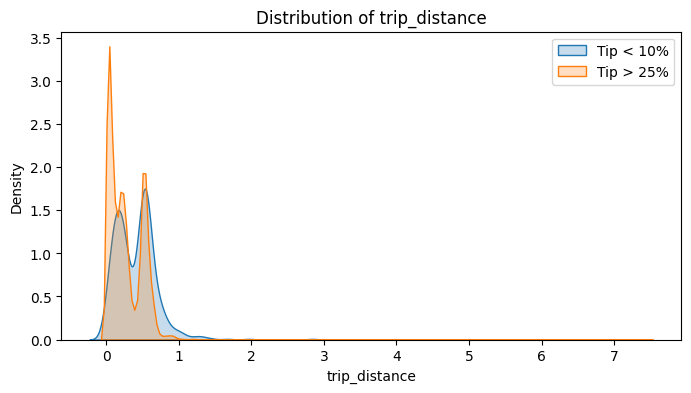

<ipython-input-105-ed73b5059389>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_tip[col], label='Tip < 10%', shade=True)
<ipython-input-105-ed73b5059389>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_tip[col], label='Tip > 25%', shade=True)


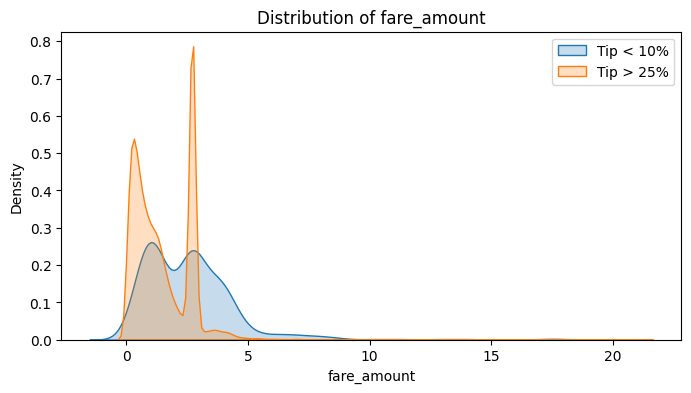

<ipython-input-105-ed73b5059389>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_tip[col], label='Tip < 10%', shade=True)
<ipython-input-105-ed73b5059389>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_tip[col], label='Tip > 25%', shade=True)


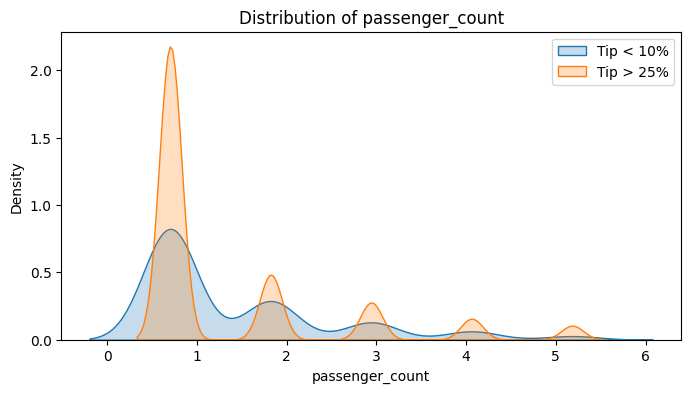

<ipython-input-105-ed73b5059389>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_tip[col], label='Tip < 10%', shade=True)
<ipython-input-105-ed73b5059389>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_tip[col], label='Tip > 25%', shade=True)


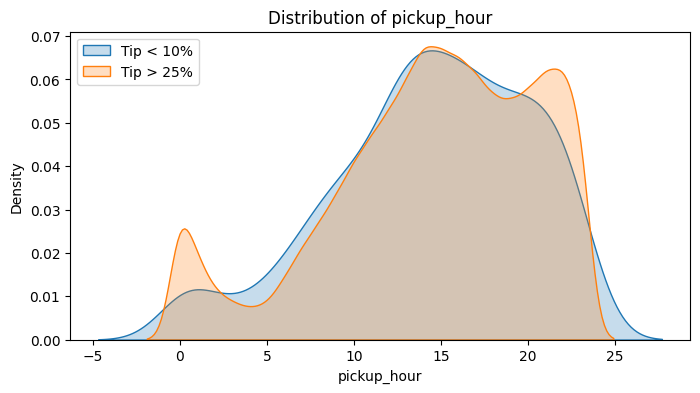

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols_to_compare:
    plt.figure(figsize=(8,4))
    sns.kdeplot(low_tip[col], label='Tip < 10%', shade=True)
    sns.kdeplot(high_tip[col], label='Tip > 25%', shade=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days

import pandas as pd

# Ensure datetime is in correct format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract hour and day of week
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.day_name()

# Average passenger count per hour
passenger_by_hour = df1.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Average passenger count per day of week (ordered)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_day = df1.groupby('day_of_week')['passenger_count'].mean().reindex(days_order).reset_index()


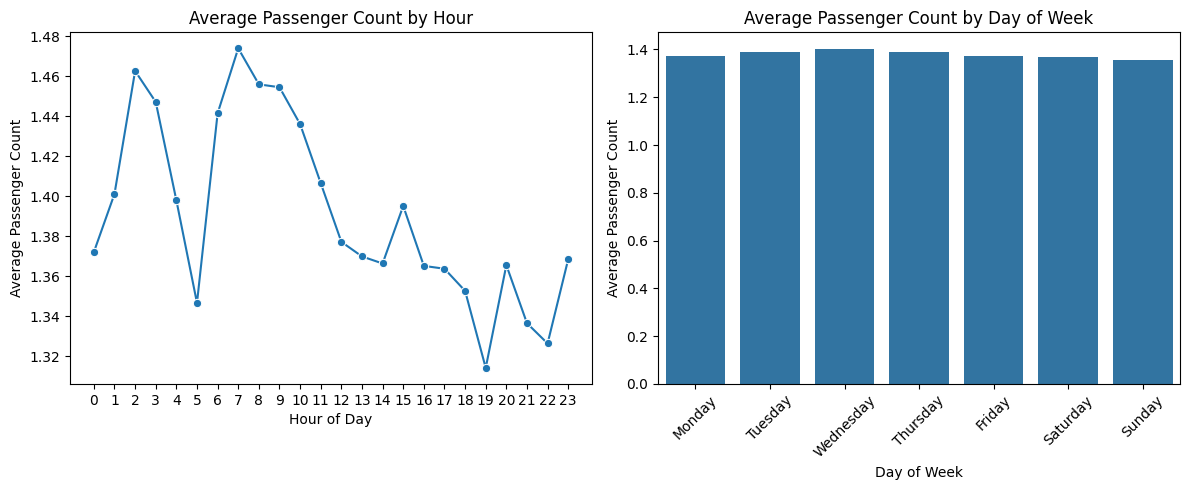

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.lineplot(data=passenger_by_hour, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0,24))

plt.subplot(1, 2, 2)
sns.barplot(data=passenger_by_day, x='day_of_week', y='passenger_count')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
zone_passenger_stats = df1.groupby('pickup_zone')['passenger_count'].agg(
    avg_passenger_count='mean',
    median_passenger_count='median',
    max_passenger_count='max',
    total_trips='count'
).reset_index()



ValueError: Grouper for 'pickup_zone' not 1-dimensional

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Aggregate total or average passenger count by LocationID
passenger_by_zone = df1.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge to zones_with_trips GeoDataFrame
gdf = df1.merge(passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

gdf.head()



KeyError: 'LocationID'

In [ ]:
# Step 1: Calculate total trips and average passengers per pickup zone
trip_stats = df1.groupby('PULocationID').agg(
    trip_count=('PULocationID', 'size'),
    avg_passenger_count=('passenger_count', 'mean')
).reset_index()

# Step 2: Merge stats into zones GeoDataFrame
zones_with_trips = gdf.merge(trip_stats, left_on='LocationID', right_on='PULocationID', how='left')

# Optional: Drop the extra column after merge
zones_with_trips.drop(columns=['PULocationID'], inplace=True)

# Now zones_with_trips is ready with trip counts and avg passenger counts per zone
print(zones_with_trips.head())


In [ ]:
# Create a new column for the average passenger count in each zone.

# Step 1: Calculate average passenger count per zone from df1
avg_passenger_count = df1.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Step 2: Merge this average back into zones_gdf
zones_gdf = zones_gdf.merge(avg_passenger_count, left_on='LocationID', right_on='PULocationID', how='left')

# Optional: drop redundant column after merge
zones_gdf.drop(columns=['PULocationID'], inplace=True)

# Now zones_gdf has a new column 'avg_passenger_count'
print(zones_gdf[['LocationID', 'zone', 'avg_passenger_count']].head())


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

print(df1['extra'].value_counts(dropna=False))

extra
-0.889018    29025
-0.343893    13261
 1.836607    12427
 0.473794     8772
 1.018919     3133
 3.199419     2786
 2.381732     2401
 4.153388     1274
 1.427763     1192
 1.155201      502
 3.880825      449
 0.064951      383
 4.698513      290
 0.610076      277
 2.790575      273
 5.516200      245
 3.335700      171
-0.207612      153
 4.425950       97
 0.337513       94
 2.518013       92
 5.243637       84
 4.562231       68
 3.744544       64
 3.063138       43
 1.564044        3
 0.882638        2
 1.700325        1
 1.972888        1
 6.879012        1
Name: count, dtype: int64


In [ ]:
print(df1['congestion_surcharge'].value_counts(dropna=False))

congestion_surcharge
 0.28769    65408
-3.47598    12156
Name: count, dtype: int64


In [ ]:
print(df1['airport_fee'].value_counts(dropna=False))


airport_fee
 NaN         71874
-0.311732     3378
 3.207881     2312
Name: count, dtype: int64


standardized

In [ ]:
surcharge_summary = {
    'extra': df1['extra'].value_counts().sort_index(),
    'congestion_surcharge': df1['congestion_surcharge'].value_counts().sort_index(),
    'airport_fee': df1['airport_fee'].value_counts().sort_index()
}
surcharge_df = pd.DataFrame(surcharge_summary).fillna(0).astype(int)
print(surcharge_df)


           extra  congestion_surcharge  airport_fee
-3.475980      0                 12156            0
-0.889018  29025                     0            0
-0.343893  13261                     0            0
-0.311732      0                     0         3378
-0.207612    153                     0            0
 0.064951    383                     0            0
 0.287690      0                 65408            0
 0.337513     94                     0            0
 0.473794   8772                     0            0
 0.610076    277                     0            0
 0.882638      2                     0            0
 1.018919   3133                     0            0
 1.155201    502                     0            0
 1.427763   1192                     0            0
 1.564044      3                     0            0
 1.700325      1                     0            0
 1.836607  12427                     0            0
 1.972888      1                     0            0
 2.381732   

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 has 'pickup_zone' and 'passenger_count' columns
df1['pickup_zone'] = gdf['zone']  # or the correct column name from the merge
df1.drop(columns=['zone', 'LocationID'], inplace=True, errors='ignore')

# 1. Group by zone and calculate average passenger count
zone_passenger_avg = df1.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# 2. Optionally filter to top 15 zones with most trips to reduce noise
zone_trip_counts = df1['pickup_zone'].value_counts()
top_zones = zone_trip_counts.head(15).index
zone_passenger_avg_top = zone_passenger_avg[zone_passenger_avg['pickup_zone'].isin(top_zones)]

# 3. Sort by average passenger count for better visualization
zone_passenger_avg_top = zone_passenger_avg_top.sort_values('passenger_count', ascending=False)

# 4. Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=zone_passenger_avg_top,
    y='pickup_zone',
    x='passenger_count',
    palette='viridis'
)
plt.title('Average Passenger Count by Pickup Zone (Top 15 Zones)')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Time-of-Day Deployment
Morning rush (6 AM – 10 AM):
Position more cabs in residential zones feeding into business districts and transit hubs.
Reason: High outbound commute demand.

Midday lull (11 AM – 3 PM):
Rebalance cabs towards entertainment zones, shopping districts, and airports where midday activity spikes.
Reason: Lunch hour trips, shopping, airport pickups.

Evening peak (4 PM – 8 PM):
Concentrate cabs near office areas and train stations for inbound commuters, plus popular dining zones.
Reason: Homebound traffic and social outings.

Night hours (11 PM – 4 AM):
Focus on nightlife hubs, airports, and hotel districts.
Reason: Late-night demand spikes.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

| Time / Day / Zone           | Strategy                       | Goal                          |
| --------------------------- | ------------------------------ | ----------------------------- |
| Morning rush in residential | Preposition cabs outbound      | Capture commute demand        |
| Night in nightlife zones    | Concentrate availability       | Meet late-night demand        |
| Weekends in entertainment   | Shift fleet to leisure areas   | Maximize utilization          |
| High passenger count zones  | Use larger capacity vehicles   | Serve group trips efficiently |
| Zones with congestion       | Recommend alternate routes     | Reduce delays & idle time     |
| Airport zones               | Rebalance cabs to/from airport | Avoid supply-demand mismatch  |
